In [1]:
import numpy as np
import bilby 
import pycbc 
import sys
import torch
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#sys.path.append('/Users/qianhu/Documents/Glasgow/research/river')
import river.data
from river.data.datagenerator import DataGeneratorBilbyFD
from river.data.dataset import DatasetStrainFD
#import river.data.utils as datautils
from river.data.utils import *

In [3]:
Nsample = 10
injection_parameters_all = generate_BNS_injection_parameters(
        Nsample,
        a_max=0.1,
        d_min=10,
        d_max=100,
        d_power=2)

In [4]:
source_type = 'BNS'
detector_names = ['H1', 'L1', 'V1'] 
duration = 32
f_low = 20
f_ref = 20
sampling_frequency = 2048
waveform_approximant = 'IMRPhenomPv2_NRTidal'
parameter_names = PARAMETER_NAMES_PRECESSINGBNS_BILBY
PSD_type = 'bilby_default' #'zero_noise'



In [5]:
data_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type=PSD_type)

13:39 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using zero_noise PSDs to generate data.


In [6]:
data_generator.inject_signals(injection_parameters_all, Nsample)

Injecting 0-th signal, 0.0% done


13:39 bilby WARNING : The injected signal has a duration in-band of 72.8s, but the data for detector H1 has a duration of 32s
13:39 bilby INFO    : Injected signal in H1:
13:39 bilby INFO    :   optimal SNR = 24.11
13:39 bilby INFO    :   matched filter SNR = 24.11+0.00j
13:39 bilby INFO    :   mass_1 = 2.6045884943634565
13:39 bilby INFO    :   mass_2 = 2.1925221683296474
13:39 bilby INFO    :   a_1 = 0.04492420727677823
13:39 bilby INFO    :   a_2 = 0.0573084447787421
13:39 bilby INFO    :   tilt_1 = 2.338876527874823
13:39 bilby INFO    :   tilt_2 = 3.0931916078874484
13:39 bilby INFO    :   phi_12 = 0.1601427579989176
13:39 bilby INFO    :   phi_jl = 4.310633738996369
13:39 bilby INFO    :   lambda_1 = 443.4220799298524
13:39 bilby INFO    :   lambda_2 = 758.4789844729409
13:39 bilby INFO    :   theta_jn = 2.505054280509149
13:39 bilby INFO    :   luminosity_distance = 100.0
13:39 bilby INFO    :   ra = 2.825309443582304
13:39 bilby INFO    :   dec = 0.29158690463241954
13:39 bilby

Injecting 1-th signal, 10.0% done
Injecting 2-th signal, 20.0% done
Injecting 3-th signal, 30.0% done


13:39 bilby INFO    :   mass_1 = 2.936371416628826
13:39 bilby INFO    :   mass_2 = 2.141535259767678
13:39 bilby INFO    :   a_1 = 0.019892605730525814
13:39 bilby INFO    :   a_2 = 0.01641058423892613
13:39 bilby INFO    :   tilt_1 = 1.1765797725249658
13:39 bilby INFO    :   tilt_2 = 2.056018404637784
13:39 bilby INFO    :   phi_12 = 1.7622070703870467
13:39 bilby INFO    :   phi_jl = 2.7956960168242566
13:39 bilby INFO    :   lambda_1 = 467.8213257770258
13:39 bilby INFO    :   lambda_2 = -790.3405191726733
13:39 bilby INFO    :   theta_jn = 1.4067815673055102
13:39 bilby INFO    :   luminosity_distance = 100.0
13:39 bilby INFO    :   ra = 2.3804079311895654
13:39 bilby INFO    :   dec = 1.1109718624974712
13:39 bilby INFO    :   psi = 0.01650139194217015
13:39 bilby INFO    :   phase = 0.9374194079727823
13:39 bilby INFO    :   geocent_time = 4411017.010460428
13:39 bilby WARNING : The injected signal has a duration in-band of 67.3s, but the data for detector L1 has a duration of 

Injecting 4-th signal, 40.0% done
Injecting 5-th signal, 50.0% done
Injecting 6-th signal, 60.0% done


13:39 bilby INFO    : Injected signal in L1:
13:39 bilby INFO    :   optimal SNR = 7.65
13:39 bilby INFO    :   matched filter SNR = 7.65+0.00j
13:39 bilby INFO    :   mass_1 = 2.888037321639826
13:39 bilby INFO    :   mass_2 = 1.9132187688051956
13:39 bilby INFO    :   a_1 = 0.06898025436347664
13:39 bilby INFO    :   a_2 = 0.07655941869362426
13:39 bilby INFO    :   tilt_1 = 2.6141952152652026
13:39 bilby INFO    :   tilt_2 = 2.054144231459887
13:39 bilby INFO    :   phi_12 = 3.677008596879639
13:39 bilby INFO    :   phi_jl = 2.501657750383006
13:39 bilby INFO    :   lambda_1 = 4801.469849776136
13:39 bilby INFO    :   lambda_2 = -16739.072489443068
13:39 bilby INFO    :   theta_jn = 1.3436343379891216
13:39 bilby INFO    :   luminosity_distance = 100.0
13:39 bilby INFO    :   ra = 1.2570359305475471
13:39 bilby INFO    :   dec = 0.5608122499646448
13:39 bilby INFO    :   psi = 0.6069611498725908
13:39 bilby INFO    :   phase = 1.2510870523910365
13:39 bilby INFO    :   geocent_time 

Injecting 7-th signal, 70.0% done
Injecting 8-th signal, 80.0% done
Injecting 9-th signal, 90.0% done


13:39 bilby WARNING : The injected signal has a duration in-band of 105.3s, but the data for detector H1 has a duration of 32s
13:39 bilby INFO    : Injected signal in H1:
13:39 bilby INFO    :   optimal SNR = 14.28
13:39 bilby INFO    :   matched filter SNR = 14.28+0.00j
13:39 bilby INFO    :   mass_1 = 2.943075085829535
13:39 bilby INFO    :   mass_2 = 1.2823084592944711
13:39 bilby INFO    :   a_1 = 0.06628234009275753
13:39 bilby INFO    :   a_2 = 0.02410992459802637
13:39 bilby INFO    :   tilt_1 = 0.3727061019669821
13:39 bilby INFO    :   tilt_2 = 2.431637463785224
13:39 bilby INFO    :   phi_12 = 5.934074024767043
13:39 bilby INFO    :   phi_jl = 2.698410089291385
13:39 bilby INFO    :   lambda_1 = 4246.131212818877
13:39 bilby INFO    :   lambda_2 = -49716.45730558399
13:39 bilby INFO    :   theta_jn = 1.1509372435706113
13:39 bilby INFO    :   luminosity_distance = 100.0
13:39 bilby INFO    :   ra = 1.2450164054128618
13:39 bilby INFO    :   dec = 0.16982931360798653
13:39 bi

In [3]:
data_generator.save_data('test1.h5')

NameError: name 'data_generator' is not defined

In [13]:
data_dict = load_dict_from_hdf5('test1.h5')

In [14]:
s = np.array(list(data_dict['strains'].values()))
psd = np.array(list(data_dict['PSDs'].values()))
inv_asd = np.float32(1/psd**0.5)
s_whitened = np.complex64(s*inv_asd)


In [15]:
inv_asd_t = torch.from_numpy(inv_asd*1e-23).movedim(0,1).float()
strain_t = torch.from_numpy(s_whitened).movedim(0,1) # is complex

In [7]:
#ds = DatasetStrainFD(data_dict=data_dict, parameter_names=PARAMETER_NAMES_PRECESSINGBNS_BILBY)
ds = DatasetStrainFD(data_dict=data_generator.data, parameter_names=PARAMETER_NAMES_PRECESSINGBNS_BILBY)

In [8]:
ds.strain.shape

torch.Size([10, 3, 32129])

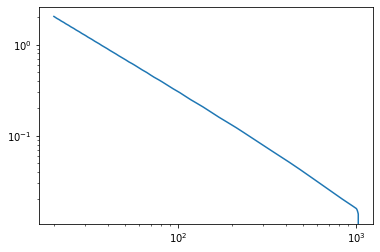

In [20]:
plt.loglog(ds.farray, abs(ds[0][1][0]) / inv_asd_t[0][1] )